array([ 0.09939501,  0.29979581,  0.49858609,  0.69898689,  0.89777796,
        1.09817876,  1.29697113,  1.49737193,  1.69616614,  1.89656694,
        2.09536348,  2.29576428,  2.49456367,  2.69496447,  2.89376719,
        3.09416799,  3.29297454,  3.49337534,  3.69218618,  3.89258698,
        4.09140256,  4.29180337,  4.49062414,  4.69102494,  4.88985133,
        5.09025213,  5.28908453,  5.48948533,  5.68832412,  5.88872492,
        6.08757046,  6.28797126,  6.48682386,  6.68722466,  6.88608464,
        7.08648544,  7.28535305,  7.48575386,  7.68462934,  7.88503015,
        8.08391371,  8.28431451,  8.4832063 ,  8.6836071 ,  8.88250725,
        9.08290805,  9.28181662,  9.48221742,  9.68113445,  9.88153525,
       10.08046072, 10.28086152, 10.47979535, 10.68019615, 10.8791382 ,
       11.079539  , 11.2784891 , 11.4788899 , 11.67784778, 11.87824859,
       12.07721393, 12.27761473, 12.47658715, 12.67698795, 12.87596696,
       13.07636776, 13.27535282, 13.47575362, 13.67474409, 13.87

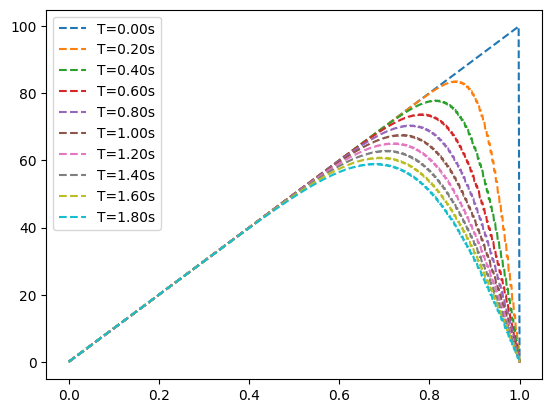

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Constant
L = 1 # Length of the rod
N = 500 # Number of cell
T = np.zeros(N) # Initialize value of Temperature
alpha = 0.01 # conductivity
total_timestep = 10000


def initial_T(T):
    # set initial value of T
    N = len(T)
    return np.linspace(0, 100, N)

T = initial_T(T)

def FVM_1d_Heat(L, N, T, alpha, total_timestep):
    dx = L / N
    X = np.linspace(0, L, N)
    dt = 0.5 * (dx**2) / alpha

    T0 = 0  # Boundary at x=0
    TL = 0  # Boundary at x=L

    for t in range(total_timestep):
        T_new = T.copy()

        for n in range(N):
            if n == 0:
                dTdx_l = (T[n] - T0) / (dx / 2)
                dTdx_r = (T[n+1] - T[n]) / dx
            elif n == N - 1:
                dTdx_l = (T[n] - T[n-1]) / dx
                dTdx_r = (TL - T[n]) / (dx / 2)
            else:
                dTdx_l = (T[n] - T[n-1]) / dx
                dTdx_r = (T[n+1] - T[n]) / dx

            dTdt = alpha * (dTdx_r - dTdx_l) / dx
            T_new[n] = T[n] + dt * dTdt

        T = T_new

        if t % 1000 == 0:
            plt.plot(X, T, '--', label=f'T={t*dt:.2f}s')

    plt.legend()

    return T
FVM_1d_Heat(L, N, T, alpha, total_timestep)